# Estimación de la potencia a contratar a partir de las curvas de demanda

Mario Mañana Canteli 

Dpto. de Ingeniería Eléctrica y Energética

Universidad de Cantabria

mananam@unican.es

El objetivo de este documento es introducir las dificultades existentes para estimar el valor óptimo de potencia a contratar utilizando como información de referencia la proporcionada por la curva de demanda de energía con diferentes niveles de agregación.

En este ejemplo se ha instalado un analizador de redes en un consumidor doméstico y se ha configurado para medir con una resolución de 2 medidas por minuto.

El fragmento de la medida que se analiza en este documento es el que corresponde al funcionamiento de una cafetera italiana más una tostadora de pan.

Este documento se ha preparado utilizando Jupyter Notebook

In [121]:
import sys
print(sys.version)

2.7.11 |Anaconda 2.3.0 (32-bit)| (default, Mar  4 2016, 15:18:41) [MSC v.1500 32 bit (Intel)]


In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime
%matplotlib inline  

El análisis se ha realizado utilizando un registro de medida de potencia con un periodo de muestreo $T_m=30$ s, que equivale a 2 muestras/minuto. 

Si se considera un intervalor de 1 hora, el número de muestras $N$ será

In [123]:
N=60*2

## Carga y pre-procesado del fichero de datos

In [124]:
nombrefichero="cisneros_20140518_I_rev.csv"
data=[] 
datos = pd.read_csv(nombrefichero, sep=';')

In [125]:
datos.head()

,Fecha,Hora,Pmedia,Energia
0,11/05/2014,01:00:00,240.455,2.004
1,11/05/2014,01:00:30,236.534,1.971
2,11/05/2014,01:01:00,218.892,1.824
3,11/05/2014,01:01:30,218.892,1.824
4,11/05/2014,01:02:00,218.892,1.824


El número de muestras del fichero es:

In [126]:
datos.shape

(22571, 4)

In [127]:
fechas=datos.Fecha
horas=datos.Hora
Pmedia=datos.Pmedia
Energia=datos.Energia
FechaHora=[]

for i,value in enumerate(fechas):
    fecha=fechas[i]
    hora=horas[i]
    fechac = fecha + " " + hora
    fechadt = datetime.strptime( fechac, '%d/%m/%Y %H:%M:%S')
    FechaHora.append( fechadt)
    
datos['FechaHora']=FechaHora
datos.head()

,Fecha,Hora,Pmedia,Energia,FechaHora
0,11/05/2014,01:00:00,240.455,2.004,2014-05-11 01:00:00
1,11/05/2014,01:00:30,236.534,1.971,2014-05-11 01:00:30
2,11/05/2014,01:01:00,218.892,1.824,2014-05-11 01:01:00
3,11/05/2014,01:01:30,218.892,1.824,2014-05-11 01:01:30
4,11/05/2014,01:02:00,218.892,1.824,2014-05-11 01:02:00


## Gráfica de la potencia media considerando periodos de agregación de 30 s

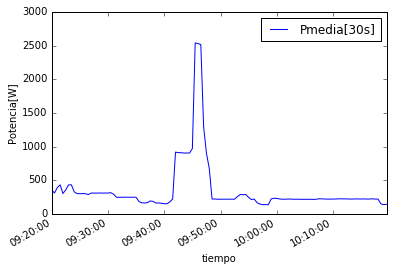

In [128]:
Ns=1000
fig, ax = plt.subplots()

ax.plot(datos.FechaHora.iloc[Ns:Ns+N].values,datos.Pmedia.iloc[Ns:Ns+N].values,label='Pmedia[30s]')
ax.xaxis_date()
fig.autofmt_xdate()
plt.xlabel('tiempo')
plt.ylabel('Potencia[W]')
plt.legend()
plt.show()

La potencia pico es de

In [129]:
print(max(datos.Pmedia.iloc[Ns:Ns+N].values))

2542.415


## Cálculo de la potencia media constante considerando un periodo de agregación de la energía de 1 hora

La Energía demandada en un periodo T se calcula como

$E = \int_T P(t)dt$

Si consideramos que la potencia $P[n]$ [W] permanece constante durante el intervalor de muestreo $T_m$ [s] entonces

$E = \frac{1}{ 3600} \sum_{i=1}^{N} P[i] \cdot T_m = \sum_{i_1}^{N} E_i $ [Wh]

In [130]:
E=0.0
for i in range(int(Ns), int(Ns+N)):
    E=E+datos.Energia.iloc[i]

print(E)
Ea=E*np.ones(int(N))

350.595


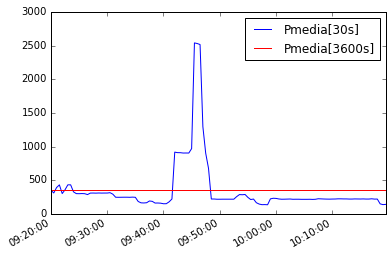

In [131]:
Ns=1000
fig, ax = plt.subplots()

ax.plot(datos.FechaHora.iloc[Ns:Ns+N].values,datos.Pmedia.iloc[Ns:Ns+N].values,label='Pmedia[30s]')
ax.plot(datos.FechaHora.iloc[Ns:Ns+N].values,Ea,color='r',label='Pmedia[3600s]')
ax.xaxis_date()
fig.autofmt_xdate()
plt.legend()
plt.show()

## Conclusiones

Como puede observarse en este ejemplo, si se estima la potencia a partir de la energía consumida en un periodo de agregación largo es posible que se cometa un error importante de estimación, especialmente si se concentran consumos en periodos muy concretos de tiempo.

Si se estimase la potencia pico con periodos de agregación de 1 hora la estimación sería de 350 W. Sin embargo, al incrementar la resolución a 2 muestras por minuto se observa que la potencia pico es de 2.542 W.